In [26]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd

In [27]:
# Load data from Github
data_url = '/Users/saurmoha/Desktop/Churn_Modelling.csv'
data=pd.read_csv(data_url)

In [28]:
# Shuffle data for taking care of patterns in data collection
from sklearn.utils import shuffle
data=shuffle(data) #shuffling the data


In [29]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9374,9375,15632538,Watson,658,Spain,Female,32,5,145553.07,1,1,1,31484.76,0
2434,2435,15613189,Browne,774,France,Female,52,2,56580.93,1,1,0,113266.28,1
6669,6670,15797900,Chinomso,517,France,Male,56,9,142147.32,1,0,0,39488.04,1
3085,3086,15571059,Martin,734,France,Female,54,3,0.00,1,1,0,130805.54,1
5082,5083,15793307,Calabresi,724,Spain,Female,41,4,142880.28,3,0,0,185541.20,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,518,15781307,Schneider,779,Germany,Male,37,7,120092.52,2,1,0,135925.72,0
1326,1327,15682773,Hayward,781,France,Female,38,3,128345.69,2,1,0,63218.85,0
4440,4441,15760121,Maynard,712,France,Male,32,9,100606.02,1,1,0,165693.06,0
3088,3089,15730448,Iroawuchi,538,Germany,Male,25,5,62482.95,1,1,1,102758.43,0


In [30]:
# Check for null values
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [31]:
# Drop irrelevant columns to set up features vector
X = data.drop(labels=['CustomerId', 'Surname', 'RowNumber', 'Exited'], axis = 1) 
# Set up labels vector
y = data['Exited']


In [32]:
# Check data types for finding categorical columns
X.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
dtype: object

In [33]:
# Examine few records for finding values in categorical columns
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
9374,658,Spain,Female,32,5,145553.07,1,1,1,31484.76
2434,774,France,Female,52,2,56580.93,1,1,0,113266.28
6669,517,France,Male,56,9,142147.32,1,0,0,39488.04
3085,734,France,Female,54,3,0.00,1,1,0,130805.54
5082,724,Spain,Female,41,4,142880.28,3,0,0,185541.20


In [34]:
# Encode categorical columns
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
X['Geography'] = label.fit_transform(X['Geography'])
X['Gender'] = label.fit_transform(X['Gender'])


In [35]:
# Drop the Geography column to reduce the number of features
X = pd.get_dummies(X, drop_first=True, columns=['Geography'])
X.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_1,Geography_2
9374,658,0,32,5,145553.07,1,1,1,31484.76,0,1
2434,774,0,52,2,56580.93,1,1,0,113266.28,0,0
6669,517,1,56,9,142147.32,1,0,0,39488.04,0,0
3085,734,0,54,3,0.00,1,1,0,130805.54,0,0
5082,724,0,41,4,142880.28,3,0,0,185541.20,0,1


In [36]:
# Scale all data points to -1 to + 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [37]:
 #Split dataset into training and validation
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [38]:
# Determine number of features
X_train.shape[1]

11

In [39]:
# Create a stacked layers sequential network
model = keras.models.Sequential() # Create linear stack of layers
model.add(keras.layers.Dense(128, activation = 'relu', input_dim = X_train.shape[1]))   
model.add(keras.layers.Dense(64, activation = 'relu')) 
model.add(keras.layers.Dense(32, activation = 'relu'))
model.add(keras.layers.Dense(1, activation = 'sigmoid')) # activation sigmoid for a single output

In [40]:
# Print model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 128)               1536      
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_6 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 33        
Total params: 11,905
Trainable params: 11,905
Non-trainable params: 0
_________________________________________________________________


In [41]:
# Compile model with desired loss function, optimizer and evaluation metrics
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [42]:
r = model.fit(X_train, y_train, batch_size = 32, epochs = 50, validation_data = (X_test, y_test))

Epoch 1/50
219/219 [==============================] - 1s 2ms/step - loss: 0.4675 - accuracy: 0.7960 - val_loss: 0.3599 - val_accuracy: 0.8567
Epoch 2/50
219/219 [==============================] - 0s 1ms/step - loss: 0.3482 - accuracy: 0.8538 - val_loss: 0.3404 - val_accuracy: 0.8620
Epoch 3/50
219/219 [==============================] - 0s 1ms/step - loss: 0.3374 - accuracy: 0.8596 - val_loss: 0.3478 - val_accuracy: 0.8620
Epoch 4/50
219/219 [==============================] - 0s 1ms/step - loss: 0.3471 - accuracy: 0.8591 - val_loss: 0.3384 - val_accuracy: 0.8633
Epoch 5/50
219/219 [==============================] - 0s 1ms/step - loss: 0.3389 - accuracy: 0.8605 - val_loss: 0.3440 - val_accuracy: 0.8603
Epoch 6/50
219/219 [==============================] - 0s 1ms/step - loss: 0.3269 - accuracy: 0.8631 - val_loss: 0.3323 - val_accuracy: 0.8620
Epoch 7/50
219/219 [==============================] - 0s 987us/step - loss: 0.3251 - accuracy: 0.8685 - val_loss: 0.3440 - val_accuracy: 0.8543
Epoc

In [43]:
# evaluate model performance on test data
test_scores = model.evaluate(X_test, y_test)
print('Test Loss: ', test_scores[0])
print('Test accuracy: ', test_scores[1] * 100)

94/94 [==============================] - 0s 505us/step - loss: 0.5031 - accuracy: 0.8220
Test Loss:  0.5030814409255981
Test accuracy:  82.20000267028809


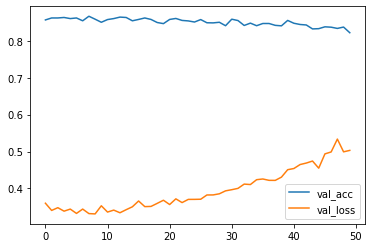

In [44]:
# Plot metrics in matplotlib
%matplotlib inline
import matplotlib.pyplot as plt #for plotting curves

plt.plot(r.history['val_accuracy'], label='val_acc')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [45]:
# Predict on test data
y_pred = model.predict_classes(X_test)
y_pred

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[0],
       [0],
       [0],
       ...,
       [0],
       [1],
       [0]], dtype=int32)

In [46]:
# Compute accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)



0.822

In [47]:
# Predict on unseen customer data
customer = model.predict([[615, 1, 22, 5, 20000, 5, 1, 1, 60000, 0, 0]])
customer

array([[0.]], dtype=float32)

In [48]:
if customer[0] == 1:
    print ("Customer is likely to leave")
else:
    print ("Customer will stay")

Customer will stay
